In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import root_mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf 

In [2]:
os.chdir(r"C:\Users\dai\Desktop\S-AI\MachineLearning\Day1\Datasets")

In [3]:
milk = pd.read_csv('monthly-milk-production-pounds-p.csv',index_col=0)
milk

,Milk
Month,
1962-01,589
1962-02,561
1962-03,640
1962-04,656
1962-05,727
...,...
1975-08,858
1975-09,817
1975-10,827


In [4]:
# temporal train test split
y = milk['Milk']
y_train = y[:156]
y_test = y[156:]
y_train.shape, y_test.shape

((156,), (12,))

In [5]:
result = adfuller(y, maxlag = 10)
print("p-value=", result[1])
if result[1] < 0.05:
    print("Time Series is stationary")
else:
    print("Time series is not Stationary")


p-value= 0.6443832606930102
Time series is not Stationary


## 1st order Differencing

<Axes: xlabel='Month'>

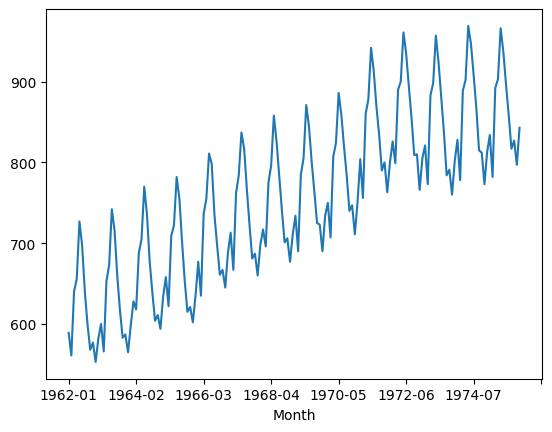

In [7]:
y.plot()

In [8]:
y.diff()[1:]


Month
1962-02   -28.0
1962-03    79.0
1962-04    16.0
1962-05    71.0
1962-06   -30.0
           ... 
1975-08   -38.0
1975-09   -41.0
1975-10    10.0
1975-11   -30.0
1975-12    46.0
Name: Milk, Length: 167, dtype: float64

In [9]:
result = adfuller(y.diff()[1:], maxlag = 10)
print("p-value=", result[1])
if result[1] < 0.05:
    print("Time Series is stationary")
else:
    print("Time series is not Stationary")

p-value= 0.0
Time Series is stationary


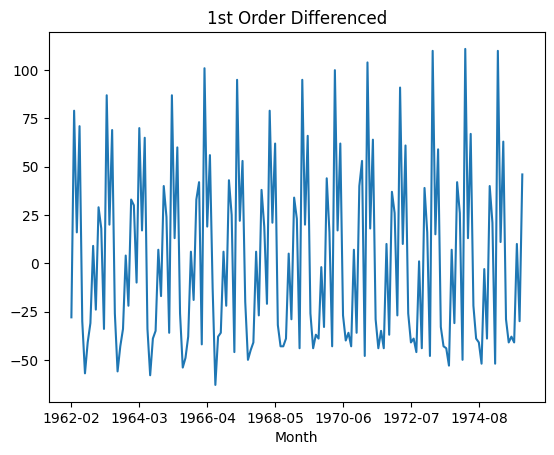

In [10]:
y.diff()[1:].plot()
plt.title("1st Order Differenced")
plt.show()

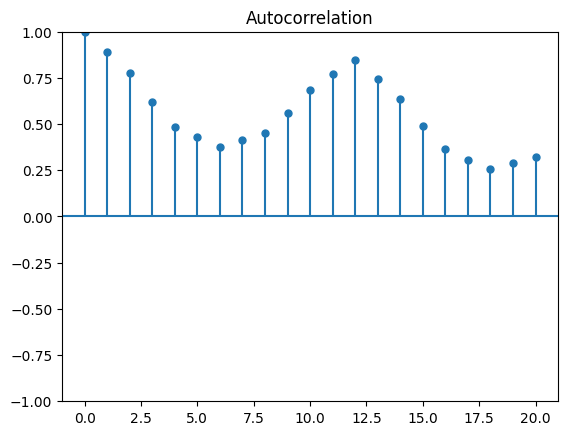

In [11]:
plot_acf(y, lags=20, alpha= None)
plt.show()

In [12]:
coal = pd.read_csv('Coal Consumption.csv',index_col=0)
coal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 1/1/1990 to 12/1/2000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Amount  132 non-null    float64
dtypes: float64(1)
memory usage: 2.1+ KB


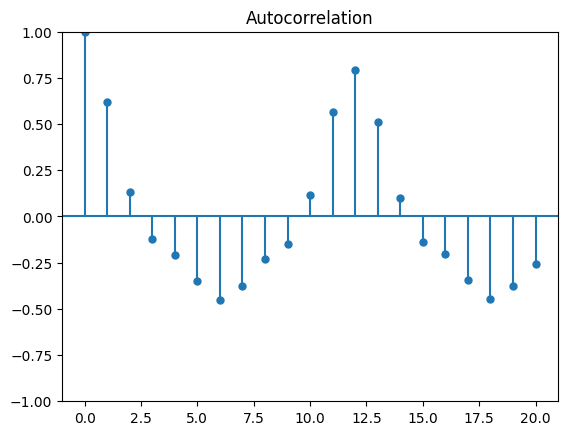

In [13]:
plot_acf(coal['Amount'], lags = 20, alpha = None)
plt.show()

## AR model

In [15]:
from statsmodels.tsa.arima.model import ARIMA

In [16]:
model = ARIMA(y_train, order=(1,0,0))
model_fit = model.fit()


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [17]:
model_fit.params

const      741.622665
ar.L1        0.900561
sigma2    1933.729258
dtype: float64

## const      741.622665 p
## ar.L1        0.900561 d
## sigma2    1933.729258 q


In [19]:
y_train.shape

(156,)

In [20]:
model_fit.predict(start=156, end = 156+12-1)

1975-01-01    805.902328
1975-02-01    799.510439
1975-03-01    793.754152
1975-04-01    788.570262
1975-05-01    783.901853
1975-06-01    779.697663
1975-07-01    775.911534
1975-08-01    772.501892
1975-09-01    769.431300
1975-10-01    766.666045
1975-11-01    764.175762
1975-12-01    761.933111
Freq: MS, Name: predicted_mean, dtype: float64

In [197]:
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test)-1)
root_mean_squared_error(y_test, y_pred)

10.448496929973517

In [22]:
y_test.index = y_pred.index


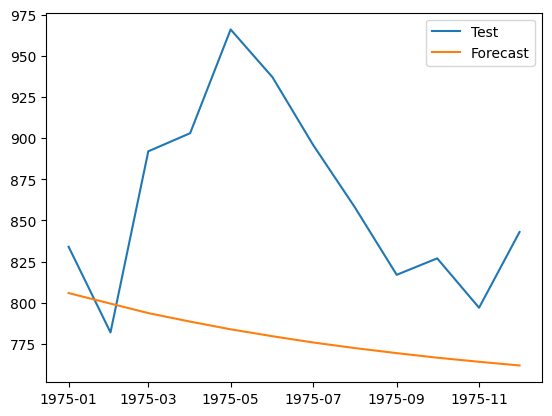

In [23]:
plt.plot(y_test,label='Test')
plt.plot(y_pred,label='Forecast')
plt.legend()
plt.show()

## Diff() lag= 1

In [25]:
#diff_1 = y.diff()[1:]

In [26]:
# y_train = diff_1[:156]
# y_test = diff_1[156:]

In [81]:
model = ARIMA(y_train, order=(12,1,0),freq= 'MS')
model_fit = model.fit()
model_fit.params

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ar.L1     -0.078091
ar.L2     -0.053266
ar.L3     -0.048696
ar.L4     -0.077445
ar.L5     -0.086203
ar.L6     -0.067616
ar.L7     -0.052294
ar.L8     -0.072445
ar.L9     -0.083088
ar.L10    -0.058672
ar.L11    -0.057890
ar.L12     0.902222
sigma2    78.521305
dtype: float64

In [88]:
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test)-1)
root_mean_squared_error(y_test, y_pred)

13.61629279740246

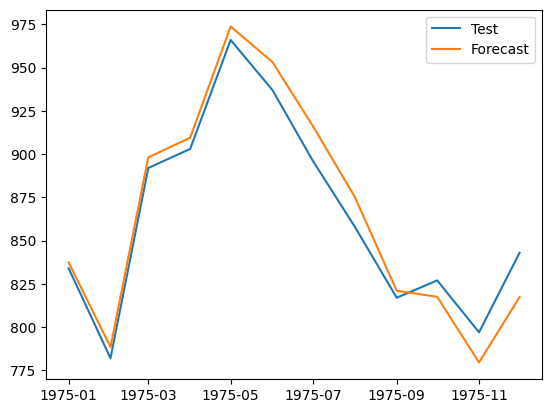

In [83]:
y_test.index = y_pred.index
plt.plot(y_test,label='Test')
plt.plot(y_pred,label='Forecast')
plt.legend()
plt.show()

## MA model

In [118]:
 model = ARIMA(y_train, order=(0,0,1),freq= 'MS')
model_fit = model.fit()
model_fit.params

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


const      746.425266
ma.L1        0.767759
sigma2    4357.968219
dtype: float64

In [110]:
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test)-1)
root_mean_squared_error(y_test, y_pred)

126.20472442575637

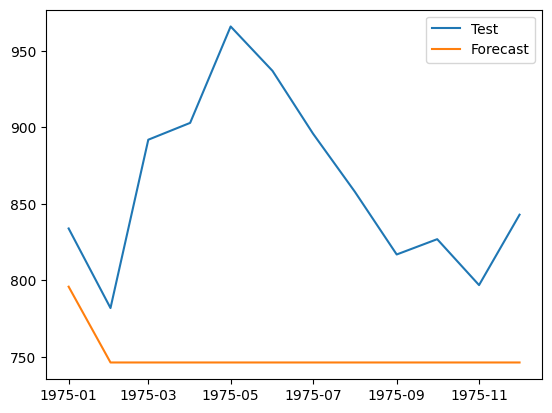

In [122]:
y_test.index = y_pred.index
plt.plot(y_test,label='Test')
plt.plot(y_pred,label='Forecast')

plt.legend()
plt.show()


## SARIMA

In [141]:
 model = ARIMA(y_train, order=(3,1,0),freq= 'MS',seasonal_order=(1,1,1,12))
model_fit = model.fit()
model_fit.params

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ar.L1       -0.263642
ar.L2       -0.044438
ar.L3        0.097068
ar.S.L12    -0.051477
ma.S.L12    -0.579486
sigma2      53.356117
dtype: float64

In [142]:
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test)-1)
root_mean_squared_error(y_test, y_pred)

10.448496929973517

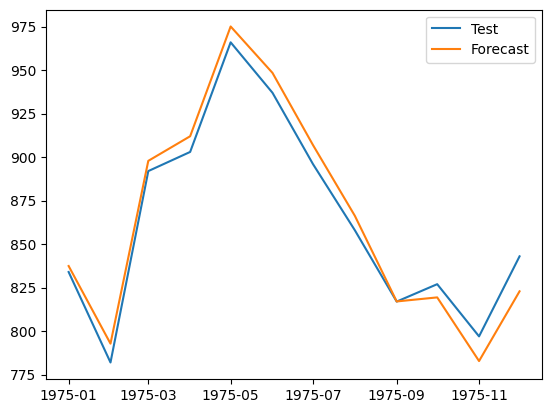

In [129]:
y_test.index = y_pred.index
plt.plot(y_test,label='Test')
plt.plot(y_pred,label='Forecast')

plt.legend()
plt.show()


In [131]:
 model = ARIMA(y_train)
model_fit = model.fit()
model_fit.params

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


const      746.403775
sigma2    9994.087856
dtype: float64

In [133]:
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test)-1)
root_mean_squared_error(y_test, y_pred)

128.2619017890676

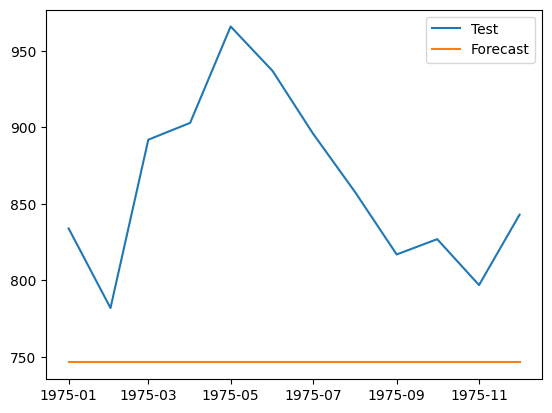

In [135]:
y_test.index = y_pred.index
plt.plot(y_test,label='Test')
plt.plot(y_pred,label='Forecast')

plt.legend()
plt.show()


In [147]:
!pip install pmdarima

  Using cached pmdarima-2.0.4-cp312-cp312-win_amd64.whl.metadata (8.0 kB)
  Using cached Cython-3.0.11-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
Using cached pmdarima-2.0.4-cp312-cp312-win_amd64.whl (625 kB)
Using cached Cython-3.0.11-cp312-cp312-win_amd64.whl (2.8 MB)


In [158]:
import pmdarima as pm
from pmdarima.arima import auto_arima

## Seasonal ARIMA

In [174]:
 model = pm.auto_arima(y_train, seasonal=True,m=12,  trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1000.136, Time=1.53 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1218.095, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1015.855, Time=0.36 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1104.312, Time=0.35 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1349.320, Time=0.03 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=998.169, Time=1.09 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1038.230, Time=0.35 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1000.125, Time=2.91 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1012.395, Time=0.95 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=4.48 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=996.457, Time=0.66 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1036.989, Time=0.20 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=998.423, Time=0.87 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=998.411, Time=1.99 sec
 ARIMA(1,0,2)(1,1,0)[12] int

In [153]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  156
Model:             SARIMAX(3, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -490.431
Date:                            Thu, 14 Nov 2024   AIC                            994.862
Time:                                    12:22:33   BIC                           1015.650
Sample:                                01-01-1962   HQIC                          1003.309
                                     - 12-01-1974                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.3091      2.038      1.623      0.105      -0.686       7.304
ar.L1         -0.2335      0.096     -2.430      0.015      -0.422      -0.045
ar.L2          0.8181      0.077     10.610      0.000       0.667       0.969
ar.L3          0.2510      0.096      2.619      0.009       0.063       0.439
ma.L1          0.9588      0.071     13.598      0.000       0.821       1.097
ma.S.L12      -0.6026      0.087     -6.948      0.000      -0.773      -0.433
sigma2        50.4392      5.268      9.575      0.000      40.115      60.764
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                50.07
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                             0.84
Prob(H) (two-sided):                  0.34   Kurtosis:                         5.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARIMA

In [166]:
 model1 = auto_arima(y_train,  trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1593.691, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1624.299, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1626.095, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1626.164, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1622.458, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1604.395, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1618.644, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1572.571, Time=0.55 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1562.631, Time=0.87 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.94 s

In [167]:
model1.params

<bound method ARIMA.params of ARIMA(order=(1, 1, 4), scoring_args={}, suppress_warnings=True)>

In [168]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  156
Model:               SARIMAX(1, 1, 4)   Log Likelihood                -774.316
Date:                Thu, 14 Nov 2024   AIC                           1562.631
Time:                        12:25:40   BIC                           1583.935
Sample:                    01-01-1962   HQIC                          1571.285
                         - 12-01-1974                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4185      0.529      4.570      0.000       1.381       3.456
ar.L1         -0.3112      0.196     -1.587      0.112      -0.696       0.073
ma.L1          0.1988      0.201      0.990      0.322      -0.195       0.592
ma.L2          0.0732      0.133      0.552      0.581      -0.187       0.333
ma.L3         -0.5270      0.169     -3.115      0.002      -0.859      -0.195
ma.L4         -0.7026      0.137     -5.127      0.000      -0.971      -0.434
sigma2      1287.9148    241.859      5.325      0.000     813.880    1761.950
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.31
Prob(Q):                              0.96   Prob(JB):                         0.07
Heteroskedasticity (H):               1.16   Skew:                             0.43
Prob(H) (two-sided):                  0.59   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARIMA without season MODeL

In [185]:
y_pred = model1.predict(n_periods=len(y_test))
root_mean_squared_error(y_test, y_pred)

55.846695394897594

## Model of SEAsonal ARIMA (SARIMA)

In [189]:
y_pred = model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test, y_pred)

13.941102797547243

## BUNDESBANK

In [203]:
 bank = pd.read_csv('BUNDESBANK-BBK01_WT5511.csv',index_col=0)

<Axes: xlabel='Date'>

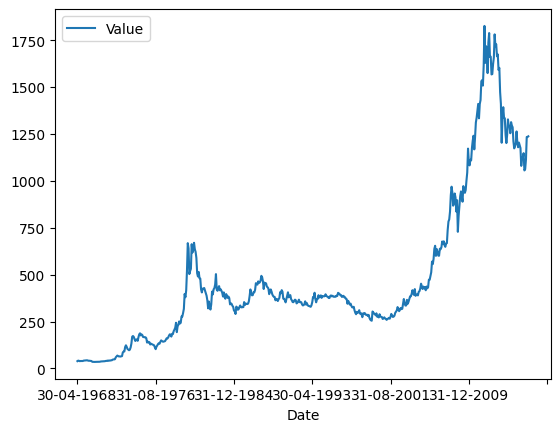

In [217]:
y_train = bank[:-12]
y_test = bank[-12:]
y = bank
y.plot()

<Axes: xlabel='Date'>

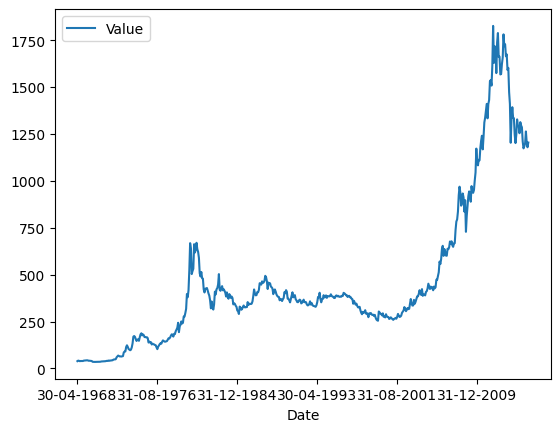

In [209]:
y_train.plot()

## ARIMA 

In [211]:
 model1 = auto_arima(y_train,  trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5622.164, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5618.047, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5617.332, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5622.101, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5618.606, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5618.188, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5617.812, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.274 seconds


In [233]:
y_pred = model1.predict(n_periods=len(y_test))
root_mean_squared_error(y_test, y_pred)

91.10508106510662

In [235]:
y_pred.index = y_test.index

<Axes: xlabel='Date'>

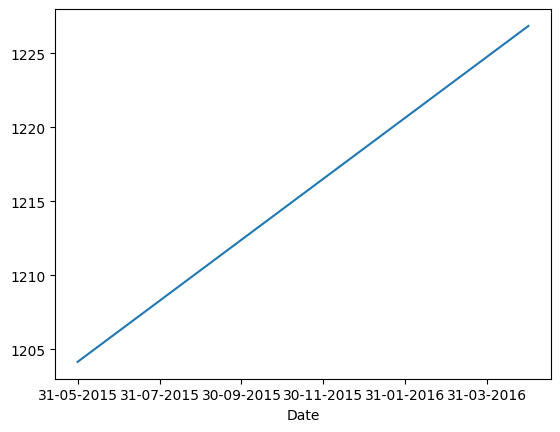

In [237]:
y_pred.plot()

## SARIMA

In [215]:
 model = pm.auto_arima(y_train, seasonal=True,m=12,  trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5615.321, Time=2.45 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5622.164, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5619.560, Time=0.44 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5618.957, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5622.101, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=5613.419, Time=2.19 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=5611.792, Time=4.88 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=5617.378, Time=5.46 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=2.78 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=5622.630, Time=2.98 sec
 ARIMA(3,1,2)(0,0,2)[12] intercept   : AIC=5626.629, Time=3.89 sec
 ARIMA(2,1,3)(0,0,2)[12] intercept   : AIC=5626.630, Time=4.38 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=5621.194, Time=2.04 sec
 ARIMA(1,1,3)(0,0,2)[12] inte

In [216]:
y_pred = model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test, y_pred)

106.01078934580089

In [225]:
y_pred.index = y_test.index

<Axes: xlabel='Date'>

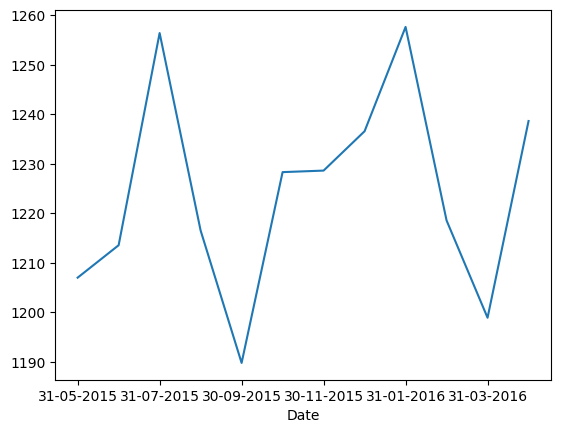

In [227]:
y_pred.plot()

## Gas Production

In [240]:
gas = pd.read_csv("AusGas.csv",index_col= 0)

In [246]:
gas.info(),gas.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 476 entries, Jan-1956 to Aug-1995
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   GasProd  476 non-null    int64
dtypes: int64(1)
memory usage: 7.4+ KB


(None,
 GasProd    0
 dtype: int64)

In [287]:
y = gas['GasProd']
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((464,), (12,))

<Axes: xlabel='Month'>

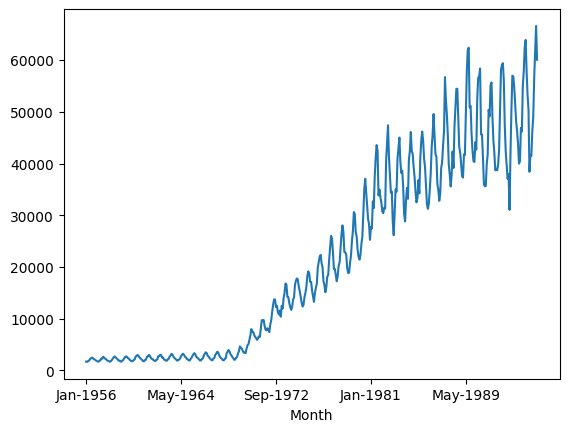

In [250]:

y.plot()



C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


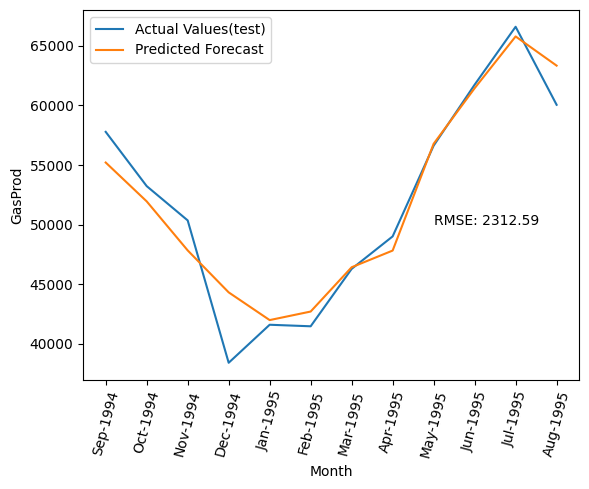

In [333]:
holt_w = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul',damped_trend=True)
# alpha, beta, gamma = 0.2, 0.4, 0.5
# alpha is for level, beta is for the trend component and gamma is for additive seasonality
# smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma
holt_w_fit = holt_w.fit()
holt_w_fcast = holt_w_fit.forecast(len(y_test))
# A series to store the forecasted values of y_test
holt_w_fcast_ser = pd.Series(holt_w_fcast, index=y_test.index)
rmse = round(root_mean_squared_error(y_test,holt_w_fcast_ser),2)
y_test.index = holt_w_fcast_ser.index
# now plotting the lineplot for the same
plt.text(8,50000,'RMSE: '+str(rmse))
sns.lineplot(y_test, label='Actual Values(test)')
sns.lineplot(holt_w_fcast_ser,label='Predicted Forecast')
plt.legend(loc='best')
plt.xticks(rotation=75)
plt.show()


## SA

In [317]:
 model = pm.auto_arima(y_train, seasonal=True,m=12,  trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.38 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8632.352, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8255.565, Time=0.92 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8438.509, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8631.502, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8589.946, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.78 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=8170.932, Time=1.61 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=8438.053, Time=0.60 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=8218.659, Time=2.95 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=8208.277, Time=3.42 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=8371.138, Time=1.43 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.67 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8219.426, Time=1.13 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

In [335]:
y_pred = model.predict(n_periods=len(y_test))
root_mean_squared_error(holt_w_fcast_ser, y_pred)

2010.3308720288608

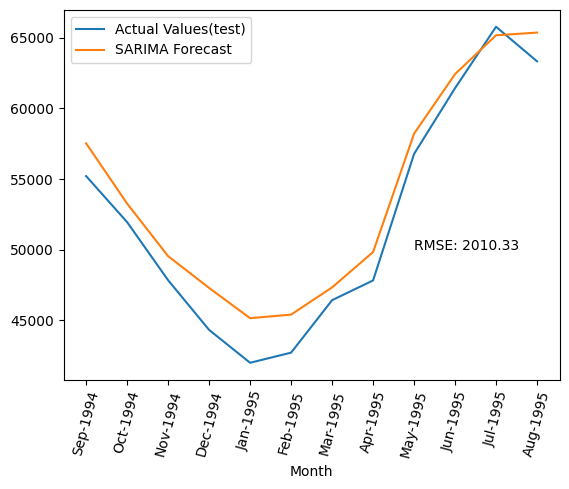

In [339]:
y_pred.index = y_test.index
rmse = round(root_mean_squared_error(holt_w_fcast_ser,y_pred),2)
# now plotting the lineplot for the same
plt.text(8,50000,'RMSE: '+str(rmse))
sns.lineplot(holt_w_fcast_ser, label='Actual Values(test)')
sns.lineplot(y_pred,label='SARIMA Forecast')
plt.legend(loc='best')
plt.xticks(rotation=75)
plt.show()

<Axes: xlabel='Month'>

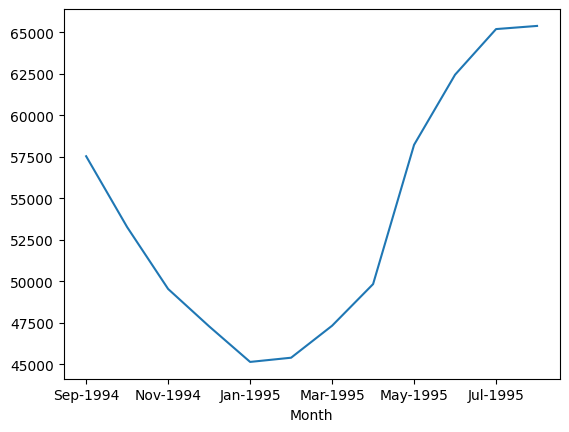

In [343]:
y_pred.index = holt_w_fcast_ser.index
y_pred.plot()

## Arima

In [345]:
 model1 = auto_arima(y_train,  trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8355.010, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8632.352, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8589.946, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8603.593, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8631.502, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.932, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8577.053, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8327.013, Time=1.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8426.177, Time=0.80 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8270.659, Time=1.17 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8404.271, Time=0.90 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=8390.858, Time=1.53 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=8

In [346]:
y_pred = model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test, y_pred)

3449.0026759037787

<Axes: xlabel='Month'>

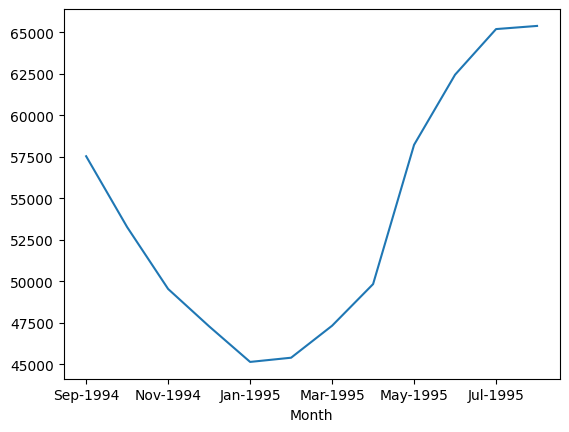

In [347]:
y_pred.index = y_test.index
y_pred.plot()

In [285]:
holt_w_fcast_ser

Month
Sep-1994    57439.665148
Oct-1994    52218.786127
Nov-1994    48759.102485
Dec-1994    45421.403212
Jan-1995    42496.426222
Feb-1995    43302.222611
Mar-1995    45641.639975
Apr-1995    48236.599169
May-1995    57380.333087
Jun-1995    61861.443960
Jul-1995    64978.684786
Aug-1995    63428.656519
dtype: float64

In [286]:
 model1 = auto_arima(holt_w_fcast_ser,  trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=253.055, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=240.479, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=297.204, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=230.617, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=228.731, Time=0.13 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=230.454, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=241.192, Time=0.13 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=233.386, Time=0.30 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=240.816, Time=0.09 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 1.623 seconds


In [348]:
y_pred = model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test, y_pred)

3449.0026759037787

<Axes: xlabel='Month'>

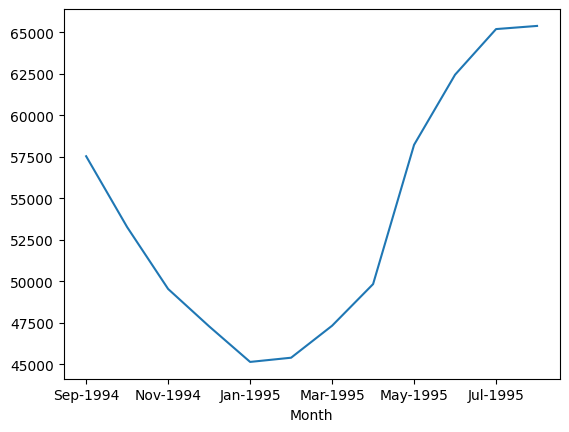

In [353]:
y_pred.index = y_test.index
y_pred.plot()

## Shampoo DAtaset

In [356]:
shampoo = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv',index_col=0)


<Axes: xlabel='Month'>

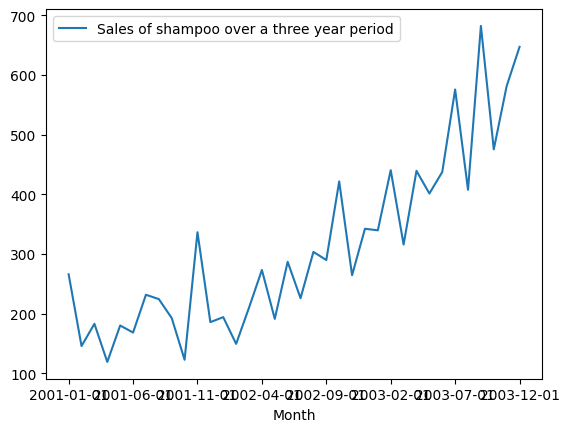

In [358]:
y=shampoo
y.plot()

In [430]:
y_train = y[:-6]
y_test = y[-6:]
y_train.shape, y_test.shape

((30, 1), (6, 1))

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


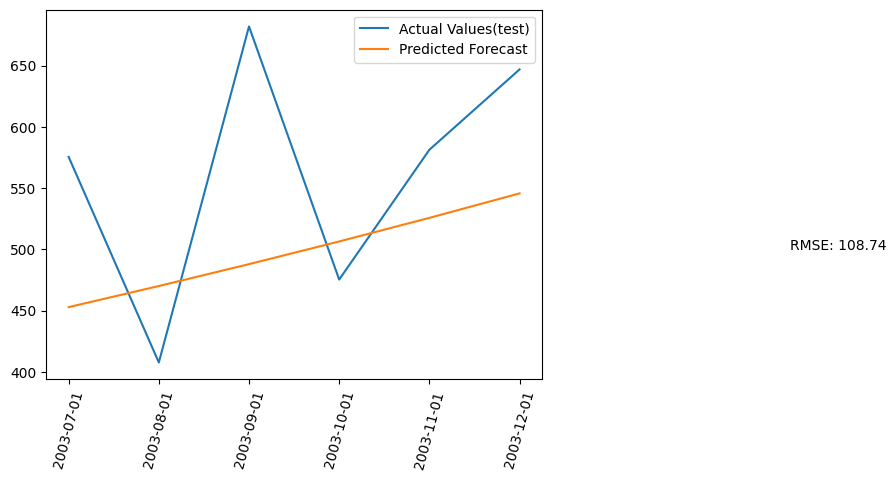

In [446]:
holt1 =Holt(y_train,exponential=True)

holt2 = holt1.fit()
holt3 = holt2.forecast(len(y_test))
# A series to store the forecasted values of y_test
holt4 = pd.Series(holt3, index=y_test.index)
rmse = round(root_mean_squared_error(y_test,holt4),2)

# now plotting the lineplot for the same
plt.text(8,500,'RMSE: '+str(rmse))
plt.plot(y_test, label='Actual Values(test)')
plt.plot(holt4,label='Predicted Forecast')
plt.legend(loc='best')
plt.xticks(rotation=75)
plt.show()

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


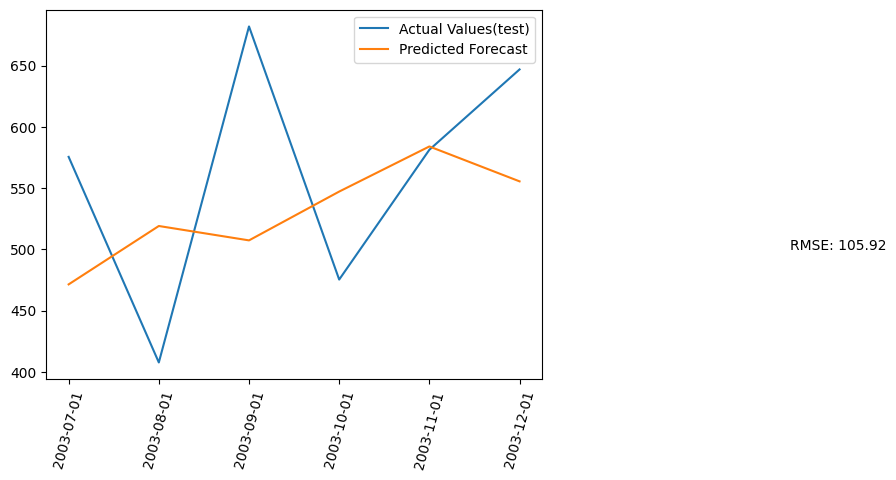

In [442]:
holt5 = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add')
# alpha, beta, gamma = 0.2, 0.4, 0.5
# alpha is for level, beta is for the trend component and gamma is for additive seasonality
# smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma
holt6 = holt5.fit()
holt7 = holt6.forecast(len(y_test))
# A series to store the forecasted values of y_test
holt8 = pd.Series(holt7, index=y_test.index)
rmse = round(root_mean_squared_error(y_test,holt8),2)

# now plotting the lineplot for the same
plt.text(8,500,'RMSE: '+str(rmse))
plt.plot(y_test, label='Actual Values(test)')
plt.plot(holt8,label='Predicted Forecast')
plt.legend(loc='best')
plt.xticks(rotation=75)
plt.show()


In [448]:
 model1 = auto_arima(y_train,  trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=346.449, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=329.759, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=328.826, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=344.577, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=327.141, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=329.032, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=326.967, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=329.338, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 1.615 seconds


In [449]:
y_pred = model1.predict(n_periods=len(y_test))
root_mean_squared_error(holt8, y_pred)

81.07411565904842

## WGEM dataset

In [453]:
gem = pd.read_csv('WGEM-IND_CPTOTNSXN.csv',index_col=0)

In [455]:
gem.shape

(31, 1)

<Axes: xlabel='Date'>

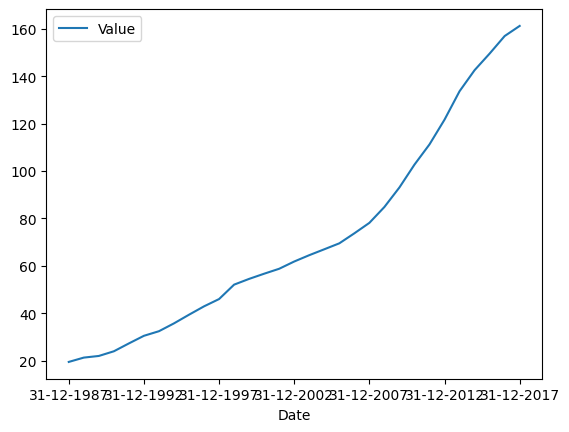

In [457]:
gem.plot()

In [524]:
y_train = gem[:-4]
y_test = gem[-4:]
y = gem
y_train.shape, y_test.shape

((27, 1), (4, 1))

## HOLT 

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


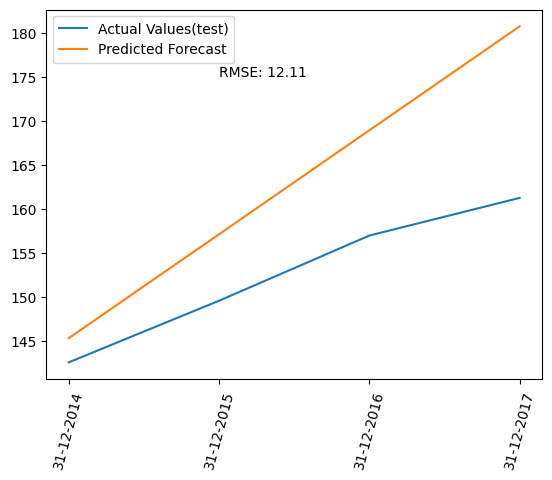

In [492]:
holt1 =Holt(y_train)

holt2 = holt1.fit()
holt3 = holt2.forecast(len(y_test))
# A series to store the forecasted values of y_test
holt4 = pd.Series(holt3, index=y_test.index)
rmse = round(root_mean_squared_error(y_test,holt4),2)

# now plotting the lineplot for the same
plt.text(1,175,'RMSE: '+str(rmse))
plt.plot(y_test, label='Actual Values(test)')
plt.plot(holt4,label='Predicted Forecast')
plt.legend(loc='best')
plt.xticks(rotation=75)
plt.show()

## WINter holt

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


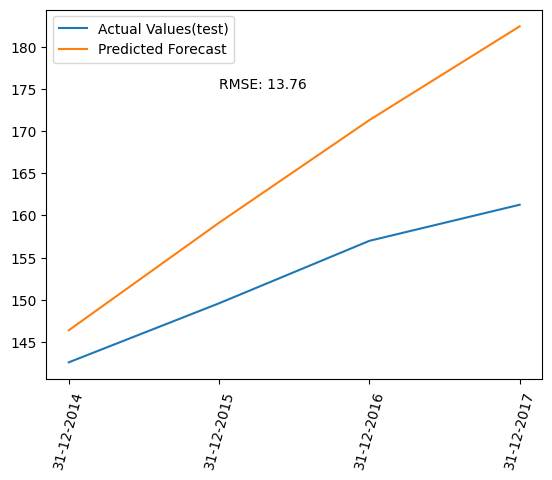

In [469]:
holt5 = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add')
# alpha, beta, gamma = 0.2, 0.4, 0.5
# alpha is for level, beta is for the trend component and gamma is for additive seasonality
# smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma
holt6 = holt5.fit()
holt7 = holt6.forecast(len(y_test))
# A series to store the forecasted values of y_test
holt8 = pd.Series(holt7, index=y_test.index)
rmse = round(root_mean_squared_error(y_test,holt8),2)

# now plotting the lineplot for the same
plt.text(1,175,'RMSE: '+str(rmse))
plt.plot(y_test, label='Actual Values(test)')
plt.plot(holt8,label='Predicted Forecast')
plt.legend(loc='best')
plt.xticks(rotation=75)
plt.show()


## AUTO ARIMA

In [473]:
 model2 = auto_arima(y_train,  trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=91.240, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=92.766, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=92.810, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=91.165, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=91.712, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=91.639, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=93.617, Time=0.05 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.578 seconds


In [479]:
y_pred = model2.predict(n_periods=len(y_test))
root_mean_squared_error(y_test, y_pred)

15.240717754968092

In [481]:
y_pred = model2.predict(n_periods=len(y_test))
root_mean_squared_error(holt8, y_pred)

1.73995918045237

<Axes: xlabel='Date'>

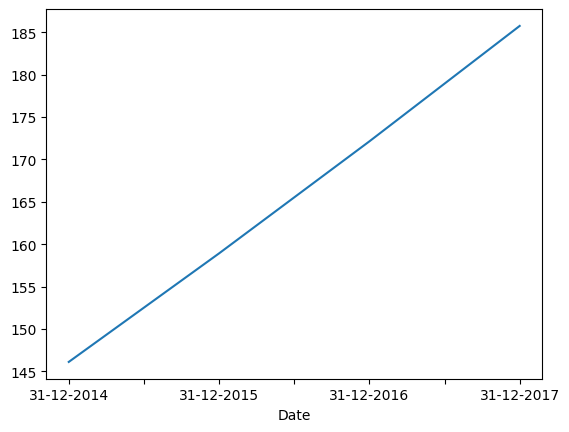

In [488]:
y_pred.index = y_test.index
y_pred.plot()

In [526]:
holt11 = Holt(y)
fit1=holt11.fit()
fcast1 = fit1.forecast(3)

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


In [564]:
y_train = gem[:-4]
y_test = gem[-4:]
y = gem
y_train.shape, y_test.shape

((27, 1), (4, 1))

In [574]:
y.index = y.index.to_timestamp()

DatetimeIndex(['1987-01-01', '1988-01-01', '1989-01-01', '1990-01-01',
               '1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01',
               '1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01'],
              dtype='datetime64[ns]', name='Date', freq='YS-JAN')

In [576]:
fcast1.index = fcast1.index.to_timestamp()

In [578]:
#fcast1.index = pd.DatetimeIndex(fcast1.index,yearfirst=True).to_period("Y")
#y.index = pd.DatetimeIndex(y.index, dayfirst = True).to_period("Y")

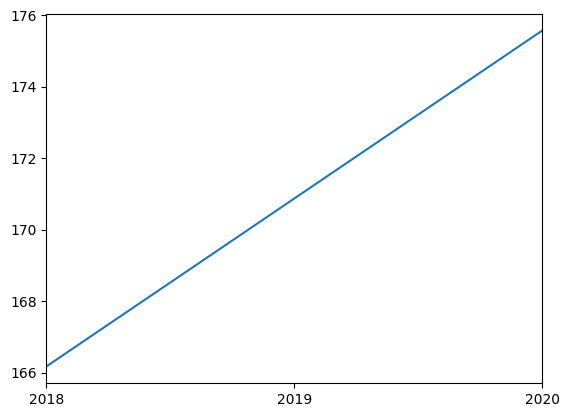

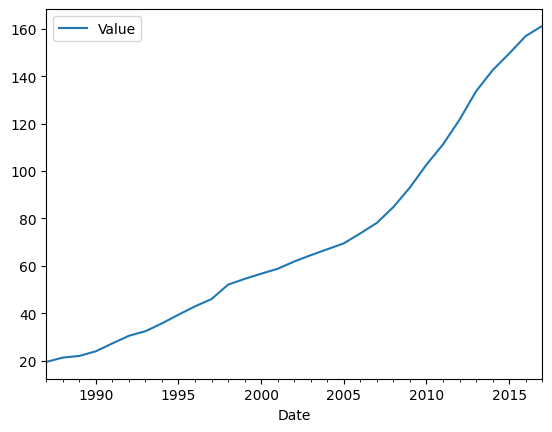

In [580]:
fcast1.plot(label='Holt Forecast')
y.plot(label='Data')
plt.legend(loc='best')
plt.show()